## Welcome to my WHR 2024 exploration.

Here we will pick apart and get a deep dive on the report, having a clear question(s) on what to look for and get answered, finding correlations, driving trends, relationships, distributions and so on.

There will be a lot of tinkering about, but that is ok!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [32]:
orig_df = pd.read_excel("/home/olav/dev/python/practical-statistics-for-data-scientists/data/DataForTable2.1.xls")
orig_df = orig_df.rename(columns={"Life Ladder": "ll"})

In [49]:
# To work with something easier to write!
df = orig_df.copy(deep=True)

Let's take a look at the data

In [33]:
orig_df.shape

(2363, 11)

In [34]:
orig_df.head()

,Country name,year,ll,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919


In [79]:
df["Country name"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hong Kong S.A.R. of China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Jamaica', 'Japan', 

Answers to the question end up in the *Life Ladder* column.

We can start looking at the data, plot some country's statistics vs each other.

(0.0, 8.06109938621521)

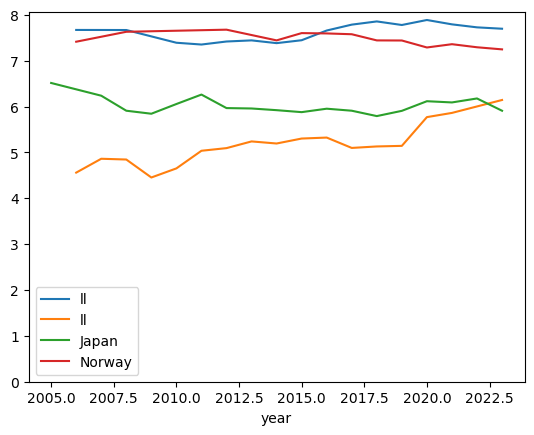

In [36]:
ax = plt.gca()
col_to_plot = "ll"
orig_df[orig_df["Country name"] == "Finland"].plot(x="year", y=col_to_plot, ax=ax)
orig_df[orig_df["Country name"] == "China"].plot(x="year", y=col_to_plot, ax=ax)
orig_df[orig_df["Country name"] == "Japan"].plot(x="year", label="Japan", y=col_to_plot, ax=ax)
orig_df[orig_df["Country name"] == "Norway"].plot(x="year", label="Norway", y=col_to_plot, ax=ax)

plt.ylim(0)

Here we can see some interesting trends (or so we think we can!).

So let's not get ahead of ourselves. We begin by posing hypoteses, questions that need answering and setting a direction on this stravenous journey. 

## Research questions

What is the average LL over time? Do we notice trends or shifts?

How does LL vary across coutries and continents?

Is there a specific correlation between LL and GDP p c, life expectancy or something else?

Does LL correlate with time-dependent occurings such as war outbreak, economic collapse or natural disasters?

In [37]:
orig_df["ll"].describe()

count    2363.000000
mean        5.483562
std         1.125523
min         1.281271
25%         4.646750
50%         5.448725
75%         6.323592
max         8.018934
Name: ll, dtype: float64

Here we see the std is 1.1, but the difference between the lowest ever ll and highest ever is a whopping 7 points!

Also, µ = 5.48 isn't that high. Right in the middle of the ladder.

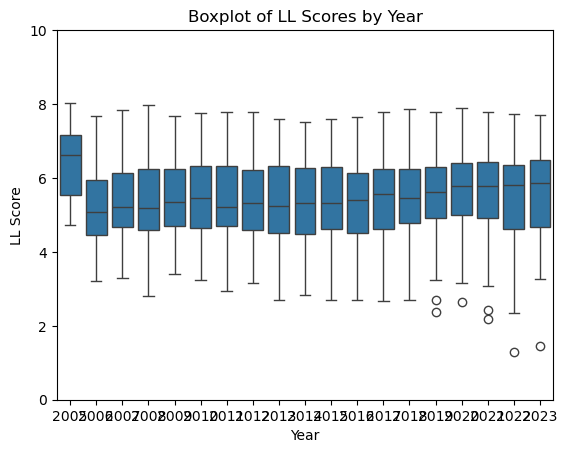

In [47]:
sns.boxplot(x="year", y="ll", data=orig_df)
plt.title('Boxplot of LL Scores by Year')
plt.xlabel('Year')
plt.ylabel('LL Score')
plt.ylim(0, 10)
plt.show()


In [84]:
df.nlargest(20, columns="ll")

,Country name,year,ll,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
539,Denmark,2005,8.018934,10.849012,0.972372,68.300003,0.971135,NaN,0.236522,0.776689,0.153672
541,Denmark,2008,7.970892,10.877718,0.953912,68.959999,0.969788,0.266182,0.247505,0.759462,0.163091
677,Finland,2020,7.889350,10.765770,0.961621,71.074997,0.962424,-0.122666,0.163636,0.747939,0.192898
675,Finland,2018,7.858107,10.779966,0.962155,70.925003,0.937807,-0.133213,0.198605,0.748826,0.181781
540,Denmark,2007,7.834233,10.888726,0.954201,68.739998,0.932086,0.234116,0.206006,0.777936,0.194324
678,Finland,2021,7.794378,10.793707,0.970289,71.150002,0.963190,-0.039151,0.191754,0.751612,0.175449
674,Finland,2017,7.788252,10.769960,0.963826,70.849998,0.962199,-0.008310,0.192413,0.755858,0.176066
544,Denmark,2011,7.788232,10.845314,0.961736,69.620003,0.934760,0.291636,0.220043,0.777892,0.174883
676,Finland,2019,7.780348,10.791038,0.937416,71.000000,0.947617,-0.057518,0.195338,0.732282,0.180733
2007,Switzerland,2012,7.776209,11.094126,0.946864,71.519997,0.945428,0.131408,0.323241,0.792705,0.176007


In [81]:
df[df["Country name"] == "Afghanistan"]

,Country name,year,ll,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919
5,Afghanistan,2013,3.572100,7.680333,0.483552,52.000000,0.577955,0.059246,0.823204,0.547417,0.273328
6,Afghanistan,2014,3.130896,7.670638,0.525568,52.299999,0.508514,0.102330,0.871242,0.491641,0.374861
7,Afghanistan,2015,3.982855,7.653833,0.528597,52.599998,0.388928,0.078218,0.880638,0.491410,0.339276
8,Afghanistan,2016,4.220169,7.650370,0.559072,52.924999,0.522566,0.040480,0.793246,0.501409,0.348332
9,Afghanistan,2017,2.661718,7.647830,0.490880,53.250000,0.427011,-0.122848,0.954393,0.435270,0.371326


First off, there is something happening in the beginning here.

There _might_ be a significant positive trend.

No outliers except in the most 5 recent years.

These are all interesting findings. We'll figure some of them out further down.

In [52]:
averaged_LL = df.groupby('year')['ll'].mean().reset_index()

(0.0, 10.0)

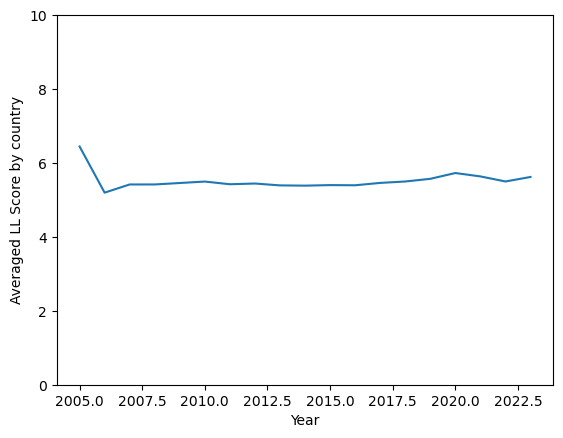

In [53]:
plt.plot(averaged_LL['year'], averaged_LL['ll'])
plt.xlabel('Year')
plt.ylabel('Averaged LL Score by country')
plt.ylim(0, 10)

Text(0.5, 0, 'LL')

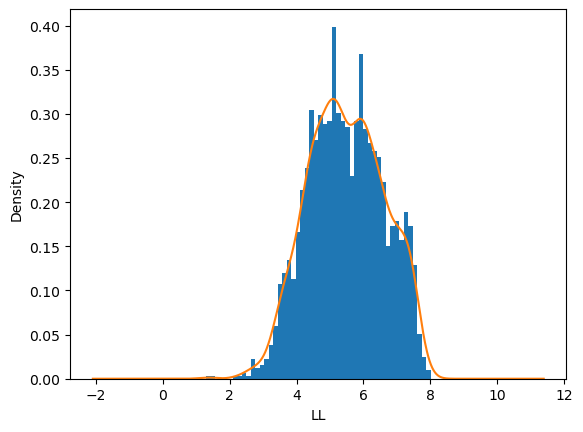

In [69]:
ax = df["ll"].plot.hist(bins=50, density=True)
df['ll'].plot.density(ax=ax)
ax.set_xlabel("LL")

In [59]:
print(df['ll'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

0.05    3.660963
0.25    4.646750
0.50    5.448725
0.75    6.323592
0.95    7.363910
Name: ll, dtype: float64


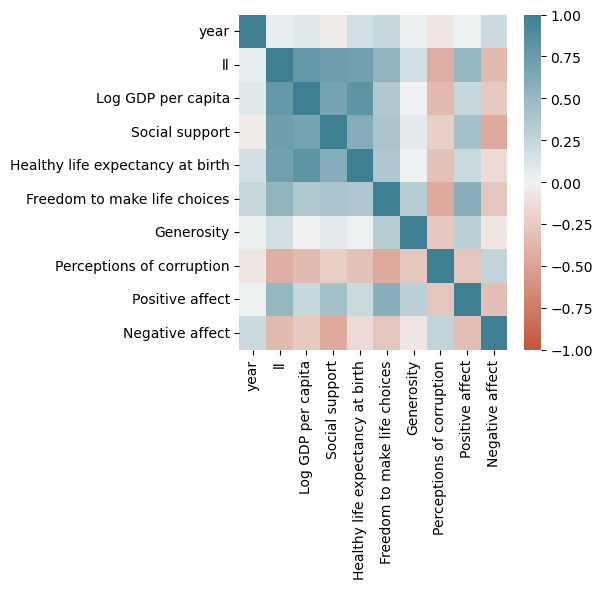

In [75]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.heatmap(df.iloc[:,1:].corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

Now this is interesting!  

Lets calculate some sample statistics

In [20]:
column = "Life Ladder"
sample_data = pd.DataFrame({
    "type": column,
    column: orig_df[column].sample(orig_df.shape[0])
})
sample_data_mean_05 = pd.DataFrame({
    "type": "mean_of_5",
    column: [orig_df[column].sample(5).mean() for _ in range(1000)],
})
sample_data_mean_100 = pd.DataFrame({
    "type": "mean_of_100",
    column: [orig_df[column].sample(100).mean() for _ in range(1000)],
})
result = pd.concat([sample_data, sample_data_mean_05, sample_data_mean_100])

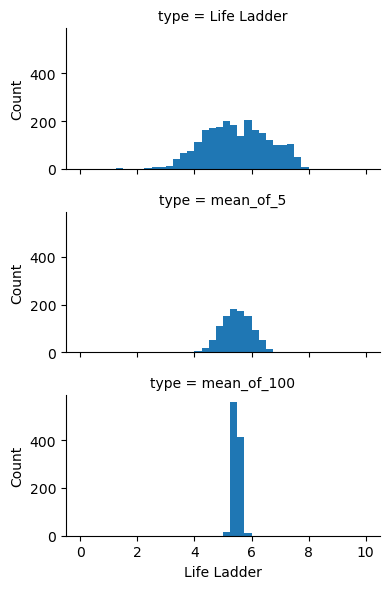

In [21]:
g = sns.FacetGrid(result, col='type', col_wrap=1, 
                  height=2, aspect=2)
g.map(plt.hist, column, range=[0, 10], bins=40)
g.set_axis_labels(column, 'Count')
plt.tight_layout()
plt.show()